In [1]:
import pandas as pd
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
warnings.filterwarnings("ignore", category=FutureWarning)



In [ ]:
def plot(df, ax, x, metric, xaxisLabel=False, order=None):

    sns.boxplot(
        data=df,
        x=x,
        y=metric,
        ax=ax,
        palette=sns.color_palette("pastel"),  # Use a better palette
        order=order,
        showfliers=False
    )

    # sns.pointplot(
    #     data=df,
    #     x=x,
    #     y=metric,
    #     ax=ax,
    #     order=order,
    #     estimator=np.mean,
    #     color='black',
    #     markers='D',
    #     scale=0.5
    # )

    if xaxisLabel:
        ax.set_xlabel('Ranker Settings', fontsize=14)
    else:
        ax.set_xlabel(None)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel(metric, fontsize=14)

    # if df[metric].max()<=1:
    #     ax.set_ylim(0.2,1)


def plot_bars_all(df, x, metrics, figsize=(10, 10), order=None, save=None):

    fig, axis = plt.subplots(len(metrics), 1, figsize=figsize, sharex=True)

    for i, metric in enumerate(metrics):
        plot(df, axis[i],  x, metric, xaxisLabel=(
            i == len(metrics)-1), order=order)

    sns.despine()

    if save is not None:
        plt.savefig(save, dpi=300)

In [3]:
def fix_df_names(df):
    mask = df['method'].str.startswith('MatchMakerGPT_') & ~df['method'].isin(
        ['MatchMakerGPT_3', 'MatchMakerGPT_5', 'MatchMakerGPT_10', 'MatchMakerGPT_20'])
    df.loc[mask, 'method'] = 'MatchMakerGPT_All'
    df['method'] = df['method'].str.replace('MatchMakerGPT_', 'k=')

    df['method'] = df['method'].str.replace('GPTMatcherSchemaOrder', 'Schema')
    df['method'] = df['method'].str.replace('GPTMatcherRandomOrder', 'Random')

    df['method'] = df['method'].str.replace('MatchMakerBP', 'Non-LLM')

    df = df.rename(columns={'All_RecallAtSizeofGroundTruth': 'Recall@GT'})
    df = df.rename(columns={'mrr': 'MRR'})

    df['Runtime(s)'] = df['runtime'].round(2)

    return df

In [4]:
files = glob.glob('./server_results/gpt_ablation/*.csv')

In [5]:
all_dfs_dict = {}

for file in files:
    df = pd.read_csv(file)
    df = fix_df_names(df)

    datasetname = df['dataset'].unique()[0]
    all_dfs_dict[datasetname] = df

    if datasetname == 'GDC':
        gdc_df = df

In [6]:
order = ['k=3', 'k=5', 'k=10', 'k=20', 'k=All', 'Schema', 'Random', 'Non-LLM']
metrics = ['MRR', 'Recall@GT', 'Runtime(s)']

In [7]:

# fig, axis = plt.subplots(len(all_dfs_dict), 1, figsize=(12, 12), sharex=True)

datasets = ['ChEMBL', 'Magellan', 'Musicians', 'OpenData', 'TPC-DI', 'gdc_studies']
realworld_datasets_non_gdc = [ 'Magellan', 'Musicians']
realworld_datasets_gdc = [ 'gdc_studies']

fabricated_datasets = ['ChEMBL', 'OpenData', 'TPC-DI']
# interested_datasets = ['gdc_studies']

# for i, datasetname in enumerate(sorted(all_dfs_dict.keys())):

#     if datasetname not in interested_datasets:
#         continue

#     print(datasetname)
#     df = all_dfs_dict[datasetname]
#     plot_bars_all(df, 'method', metrics, figsize=(10, 8), order=order)

All aggregated


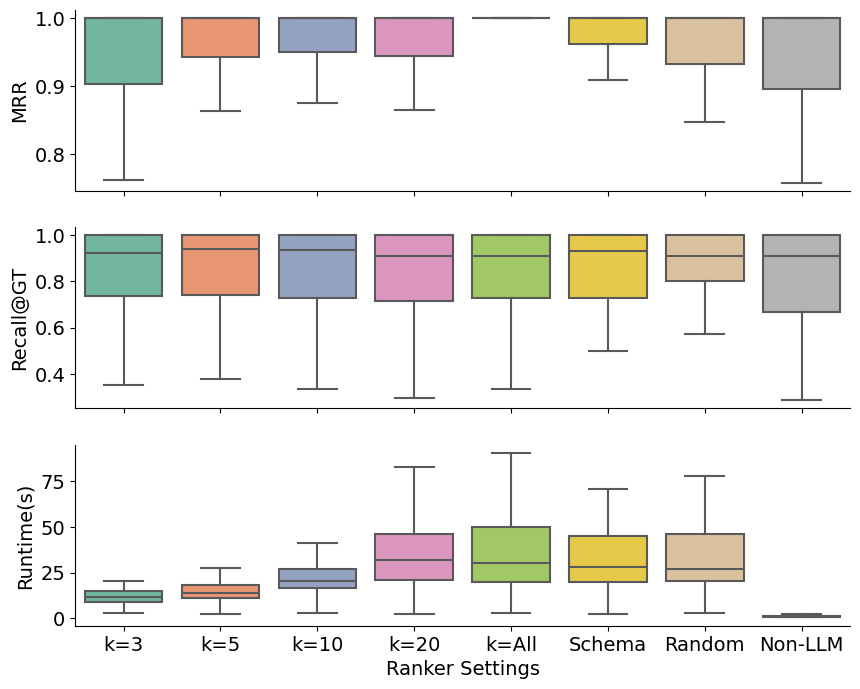

In [8]:
all_dfs = pd.concat(all_dfs_dict)
all_dfs = all_dfs.sort_values(by='dataset')


print('All aggregated')
plot_bars_all(all_dfs, 'method', metrics, figsize=(10, 8),
              order=order,  save='figures/gpt_ablation_all.pdf')

Real-world-NonGDC


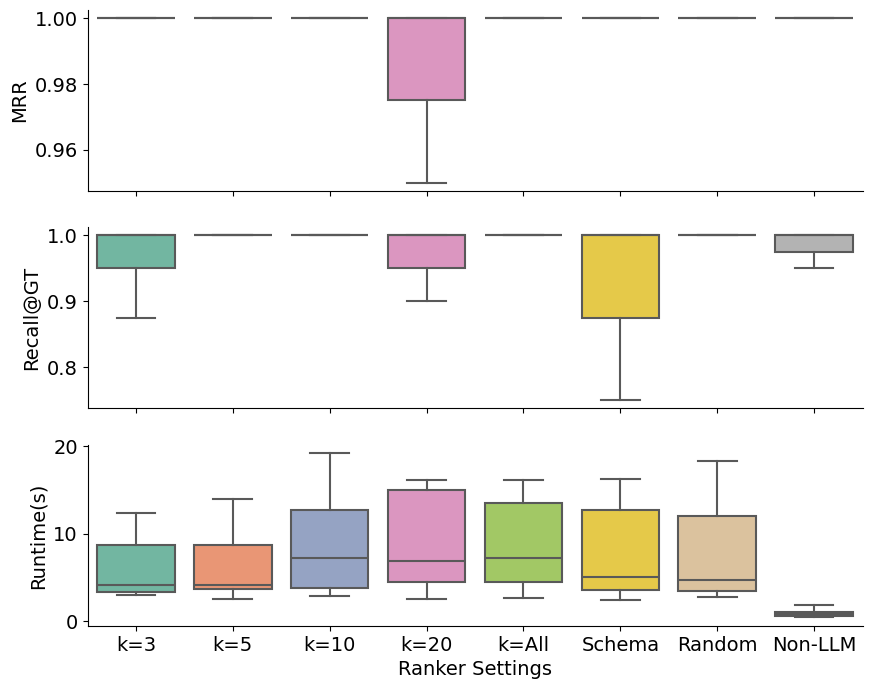

In [9]:
df_real_world = all_dfs[all_dfs['dataset'].isin(realworld_datasets_non_gdc)]

print('Real-world-NonGDC')
plot_bars_all(df_real_world, 'method', metrics, figsize=(10, 8),order=order, save='figures/gpt_ablation_realworld-nongdc.pdf')


Real-world GDC


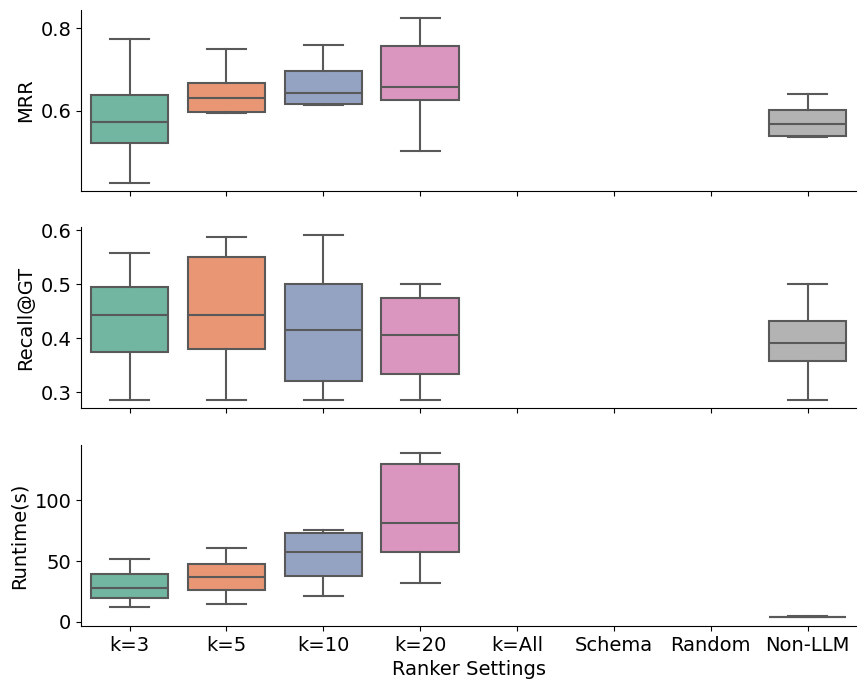

In [10]:
df_real_world = all_dfs[all_dfs['dataset'].isin(realworld_datasets_gdc)]

print('Real-world GDC')
plot_bars_all(df_real_world, 'method', metrics, figsize=(10, 8),order=order, save='figures/gpt_ablation_realworld-gdc.pdf')

Fabricated


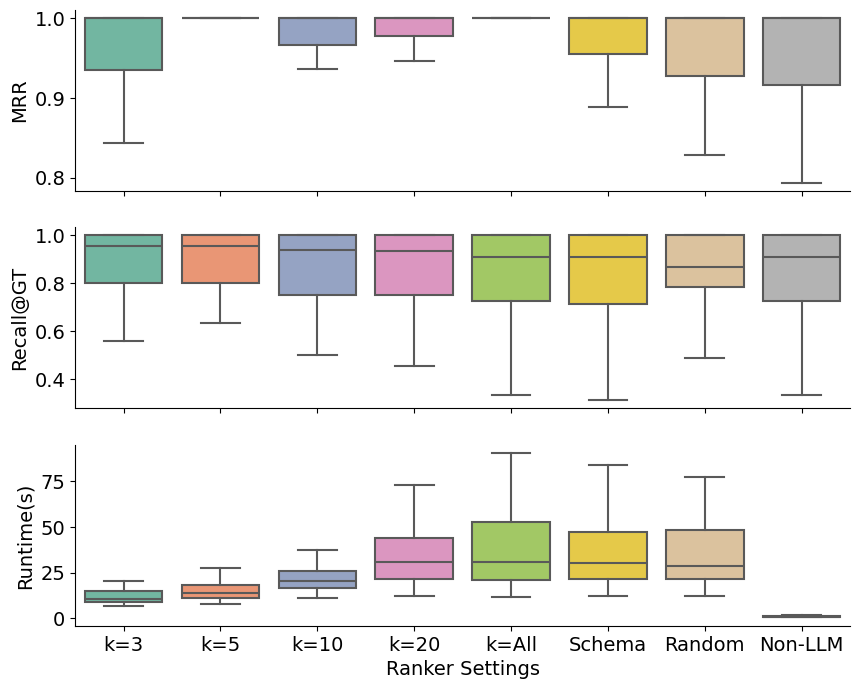

In [11]:
df_fabricated = all_dfs[all_dfs['dataset'].isin(fabricated_datasets)]

print('Fabricated') 
plot_bars_all(df_fabricated, 'method', metrics, figsize=(10, 8),order=order, save='figures/gpt_ablation_fabricated.pdf')